# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [3]:
A = integer_spiral(7)
print(A)

[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]


In [4]:
# implementation
def integer_spiral_numpy(n):
    A = np.zeros((n + 2, n + 2))

    pos = (n + 2) // 2  # init position - center
    circles = n // 2
    
    A[pos, pos] = 1
    x = 2

    for i in range(1, circles + 1):
        v = np.arange(x, x + 8 * i)  # vector for whole "circle"

        # upper edge
        A[pos - i, pos - i : pos + i] = v[2*i - 1::-1]  # first quarter of v
        # left edge
        A[pos - i + 1 : pos + i + 1, pos - i] = v[2*i : 4*i]  # second quarter of v
        # lower edge
        A[pos + i, pos - i + 1 : pos + i + 1] = v[4*i : 6*i]  # third quarter of v
        # right edge
        A[pos - i : pos + i, pos + i] = v[8*i - 1 : 6*i-1 : -1]  # last quarter of v

        x += 8*i

    return A[1:-1, 1:-1]

In [5]:
# output testing
A = integer_spiral(3)
B = integer_spiral_numpy(3)
print(A)
print(B)
print("--------------")

A = integer_spiral(7)
B = integer_spiral_numpy(7)
print(A)
print(B)

[[3. 2. 9.]
 [4. 1. 8.]
 [5. 6. 7.]]
[[3. 2. 9.]
 [4. 1. 8.]
 [5. 6. 7.]]
--------------
[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]
[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]


In [6]:
# time comparison
%timeit integer_spiral(5)
%timeit integer_spiral_numpy(5)

%timeit integer_spiral(27)
%timeit integer_spiral_numpy(27)

%timeit integer_spiral(179)
%timeit integer_spiral_numpy(179)

%timeit integer_spiral(1111)
%timeit integer_spiral_numpy(1111)

32.9 µs ± 385 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
9.72 µs ± 144 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
964 µs ± 17 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
55.9 µs ± 857 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
43.8 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
448 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.77 s ± 48.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.79 ms ± 220 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


integer_spiral_numpy je rychlejší než integer_spiral (a to docela dost)

## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
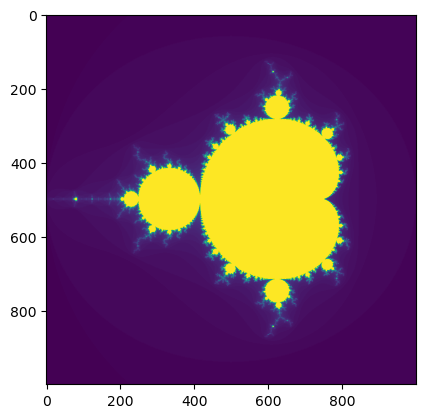

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [26]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    y, x = np.mgrid[y_min : y_max : 1j*n, x_min : x_max : 1j*n]
    
    C = x + 1j*y
    Z = np.zeros_like(C)

    divergence_matrix = np.zeros_like(Z, dtype=int)

    for i in range(k):
        Z[np.abs(Z) < 2] = Z[np.abs(Z) < 2]**2 + C[np.abs(Z) < 2]
        divergence_matrix[np.abs(Z) < 2] = i
        
    return divergence_matrix

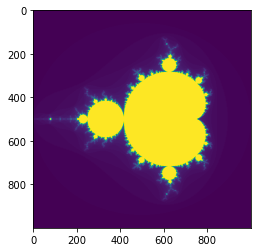

In [27]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
- Zkuste si číselnou spirálu vykreslit, a vykreslit různé funkce, můžete dostat zajímavé obrázky.
- Zkuste místo posloupnosti 1,2,... udělat spirálu pouze z prvočísel.
- Zkuste vykresilt další typy fraktálů, např. Julia set viz [Wikipedia](https://en.wikipedia.org/wiki/Julia_set).

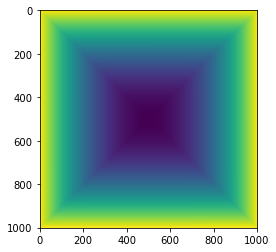

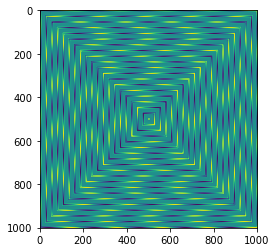

In [9]:
A = integer_spiral(1001)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03))

In [10]:
import sympy

def prime_spiral_numpy(n):
    A = np.zeros((n + 2, n + 2))

    pos = (n + 2) // 2  # init position - center
    circles = n // 2
    
    A[pos, pos] = 2
    
    primes = []
    p = 3
    while len(primes) < n**2:
        if sympy.isprime(p):
            primes.append(p)
        p += 1

    x = 0 # init idx in primes
    for i in range(1, circles + 1):
        v = primes[x : x + 8 * i]  # primes for whole "circle"

        # upper edge
        A[pos - i, pos - i : pos + i] = v[2*i - 1::-1]  # first quarter of v
        # left edge
        A[pos - i + 1 : pos + i + 1, pos - i] = v[2*i : 4*i]  # second quarter of v
        # lower edge
        A[pos + i, pos - i + 1 : pos + i + 1] = v[4*i : 6*i]  # third quarter of v
        # right edge
        A[pos - i : pos + i, pos + i] = v[8*i - 1 : 6*i-1 : -1]  # last quarter of v

        x += 8*i

    return A[1:-1, 1:-1]

[[127. 113. 109. 107. 103. 101. 227.]
 [131.  41.  37.  31.  29.  97. 223.]
 [137.  43.   5.   3.  23.  89. 211.]
 [139.  47.   7.   2.  19.  83. 199.]
 [149.  53.  11.  13.  17.  79. 197.]
 [151.  59.  61.  67.  71.  73. 193.]
 [157. 163. 167. 173. 179. 181. 191.]]


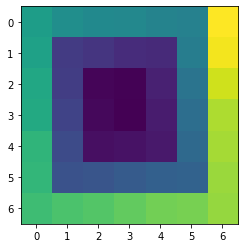

In [11]:
A = prime_spiral_numpy(7)
print(A)
plt.imshow(A)

In [46]:
def julia_set(c, x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    y, x = np.mgrid[y_min : y_max : 1j*n, x_min : x_max : 1j*n]
    
    Z = x + 1j*y

    divergence_matrix = np.zeros_like(Z, dtype=int)

    for i in range(k):
        Z[np.abs(Z) < 2] = Z[np.abs(Z) < 2]**2 + c
        divergence_matrix[np.abs(Z) < 2] = i
        
    return divergence_matrix

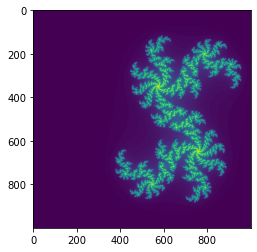

In [47]:
c = 0.4 + 0.2j
n = 1000
k = 100

divergence_matrix = julia_set(c, n=n, k=k)
plt.imshow(divergence_matrix)

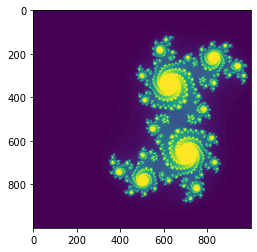

In [48]:
c = 0.355 + 0.355j
divergence_matrix = julia_set(c, n=n, k=k)
plt.imshow(divergence_matrix)